In [1]:
import os, sys
import pandas as pd
import numpy as np
import json
from matplotlib import pyplot as plt
import cv2
from tqdm import tqdm
from collections import defaultdict
import random

In [9]:
HOME = os.path.expanduser("~")
PATH = os.path.join(HOME, 'programming/pipeline_utility/src')
sys.path.append(PATH)
from lib.file_location import DATA_PATH
from lib.sqlcontroller import SqlController
color_radius = 3
animal = 'MD594'
sqlController = SqlController(animal)
ATLAS = 'atlasV8'
CSVPATH = os.path.join(DATA_PATH, 'atlas_data', ATLAS, animal)
jsonpath = os.path.join(CSVPATH,  'aligned_padded_structures.json')
print(jsonpath)
with open(jsonpath) as f:
    aligned_dict = json.load(f)

/net/birdstore/Active_Atlas_Data/data_root/atlas_data/atlasV8/MD594/aligned_padded_structures.json


In [10]:
for structure in aligned_dict.keys():
    print(structure)
#structure = random.choice(list(aligned_dict.keys()))
structure = 'SC'

10N_L
10N_R
12N
3N_L
3N_R
4N_L
4N_R
5N_L
5N_R
6N_L
6N_R
7N_L
7N_R
7n_L
7n_R
AP
Amb_L
Amb_R
DC_L
DC_R
IC
LC_L
LC_R
LRt_L
LRt_R
PBG_L
PBG_R
Pn_L
Pn_R
RtTg
SC
SNC_L
SNC_R
SNR_L
SNR_R
Sp5C_L
Sp5C_R
Sp5I_L
Sp5I_R
Sp5O_L
Sp5O_R
Tz_L
Tz_R
VCA_L
VCA_R
VCP_L
VCP_R
VLL_L
VLL_R


In [4]:
onestructure = aligned_dict[structure]

In [5]:
sections = [int(i) for i in onestructure.keys()]
section = random.choice(sections)
#section = 159
points = onestructure[str(section)]
arr = np.array(np.round(points)).astype(np.int32)
np.mean(arr, axis=0)

array([774.82733051, 257.36829096])

In [6]:
INPUT = f'/net/birdstore/Active_Atlas_Data/data_root/pipeline_data/{animal}/preps/CH1/thumbnail_aligned'
ORIGINPATH = '/net/birdstore/Active_Atlas_Data/data_root/CSHL/CSHL_volumes/MD585/10.0um_annotationAsScoreVolume'

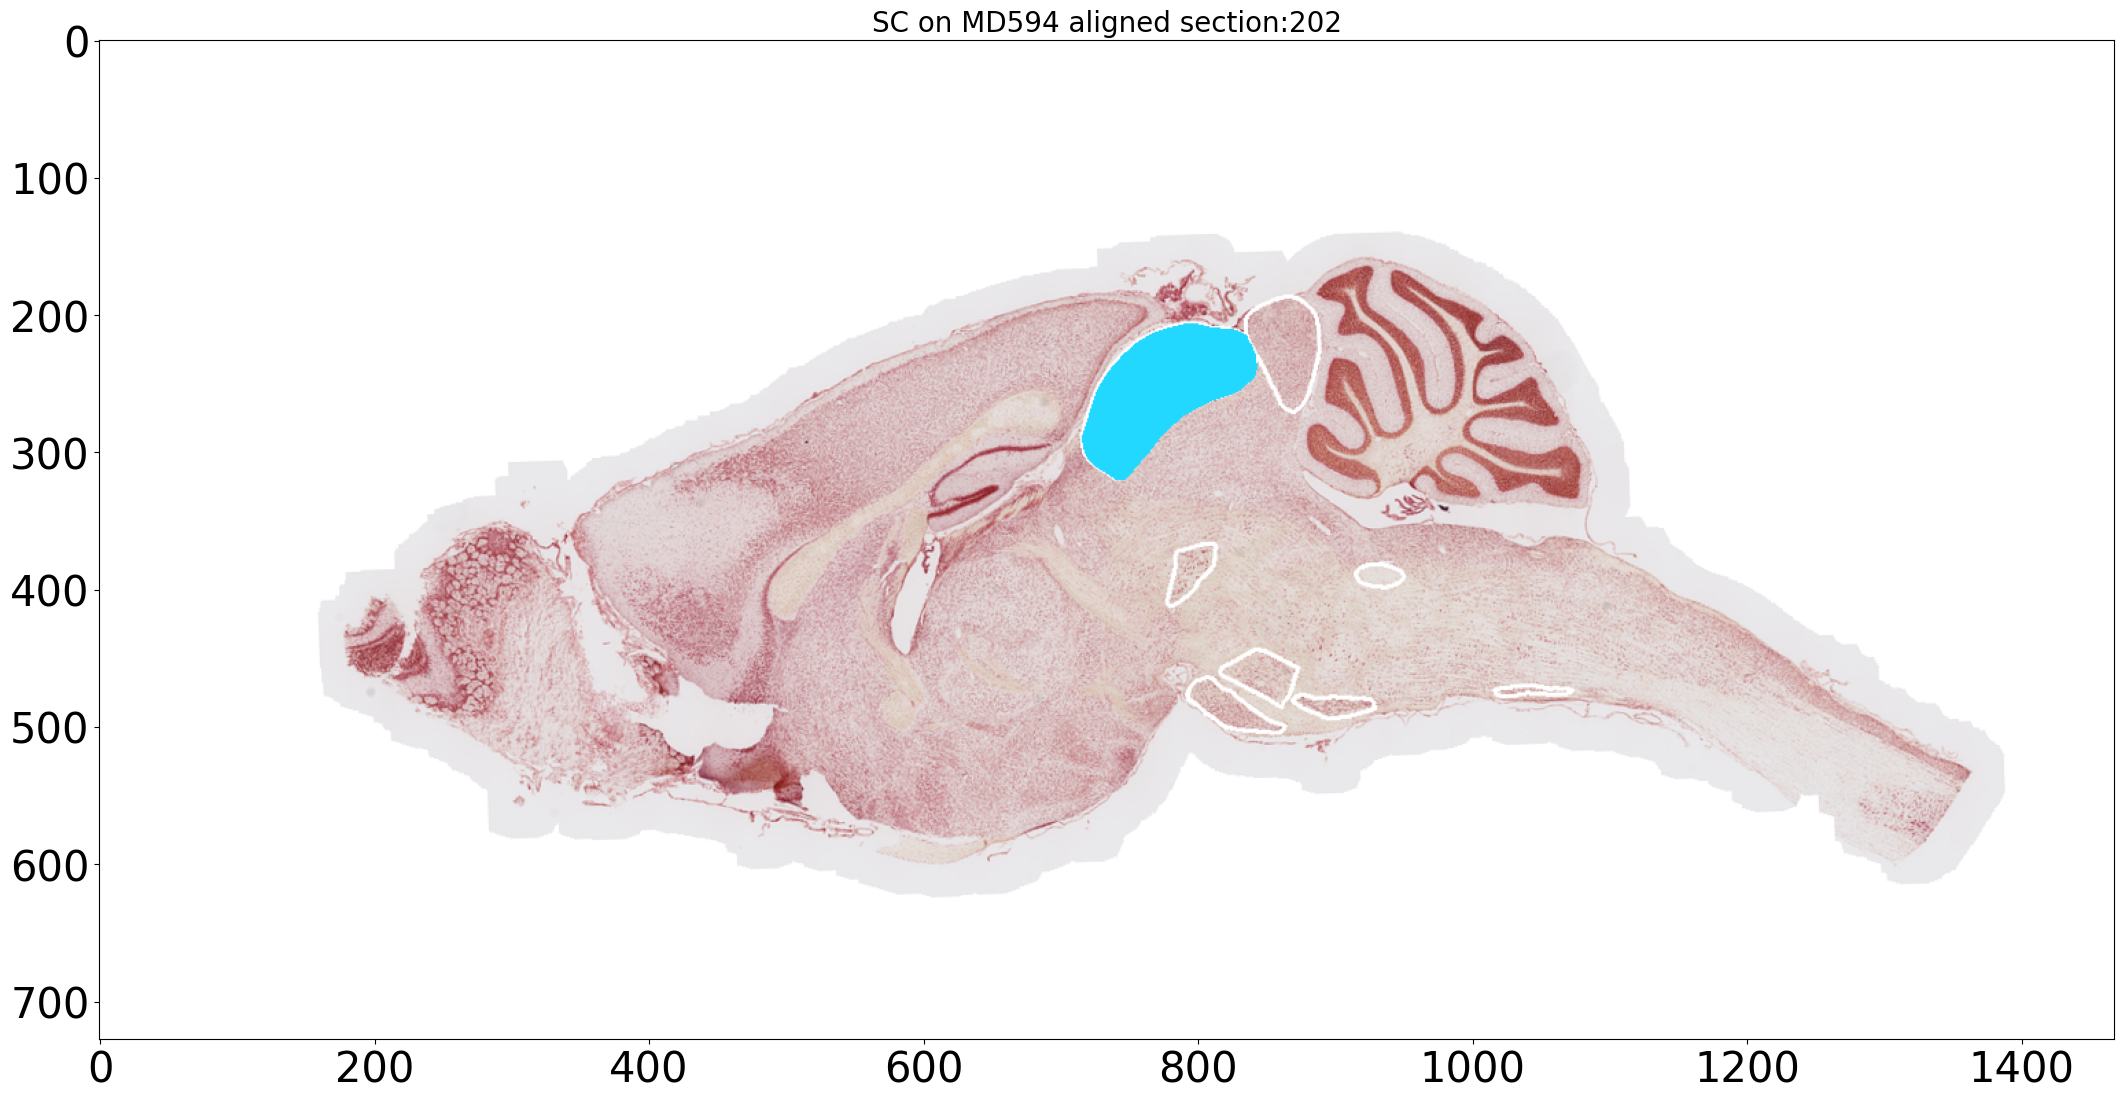

In [7]:
filepath = os.path.join(INPUT, f'{section}.tif')
img = cv2.imread(filepath)
for s, points in onestructure.items():
    if str(s) == str(section):
        arr = np.array(np.round(points)).astype(np.int32)
        color = sqlController.get_structure_color_rgb(structure)
        cv2.fillPoly(img, pts = [arr], color = color)


fig=plt.figure(figsize=(26,18), dpi= 100, facecolor='w', edgecolor='k')
plt.imshow(img, cmap="gray")
plt.title(f'{structure} on {animal} aligned section:{section}', fontsize=20)
plt.tick_params(axis='x', labelsize=30)
plt.tick_params(axis='y', labelsize=30)
plt.show()

/net/birdstore/Active_Atlas_Data/data_root/pipeline_data/MD594/preps/CH1/thumbnail_aligned/202.tif


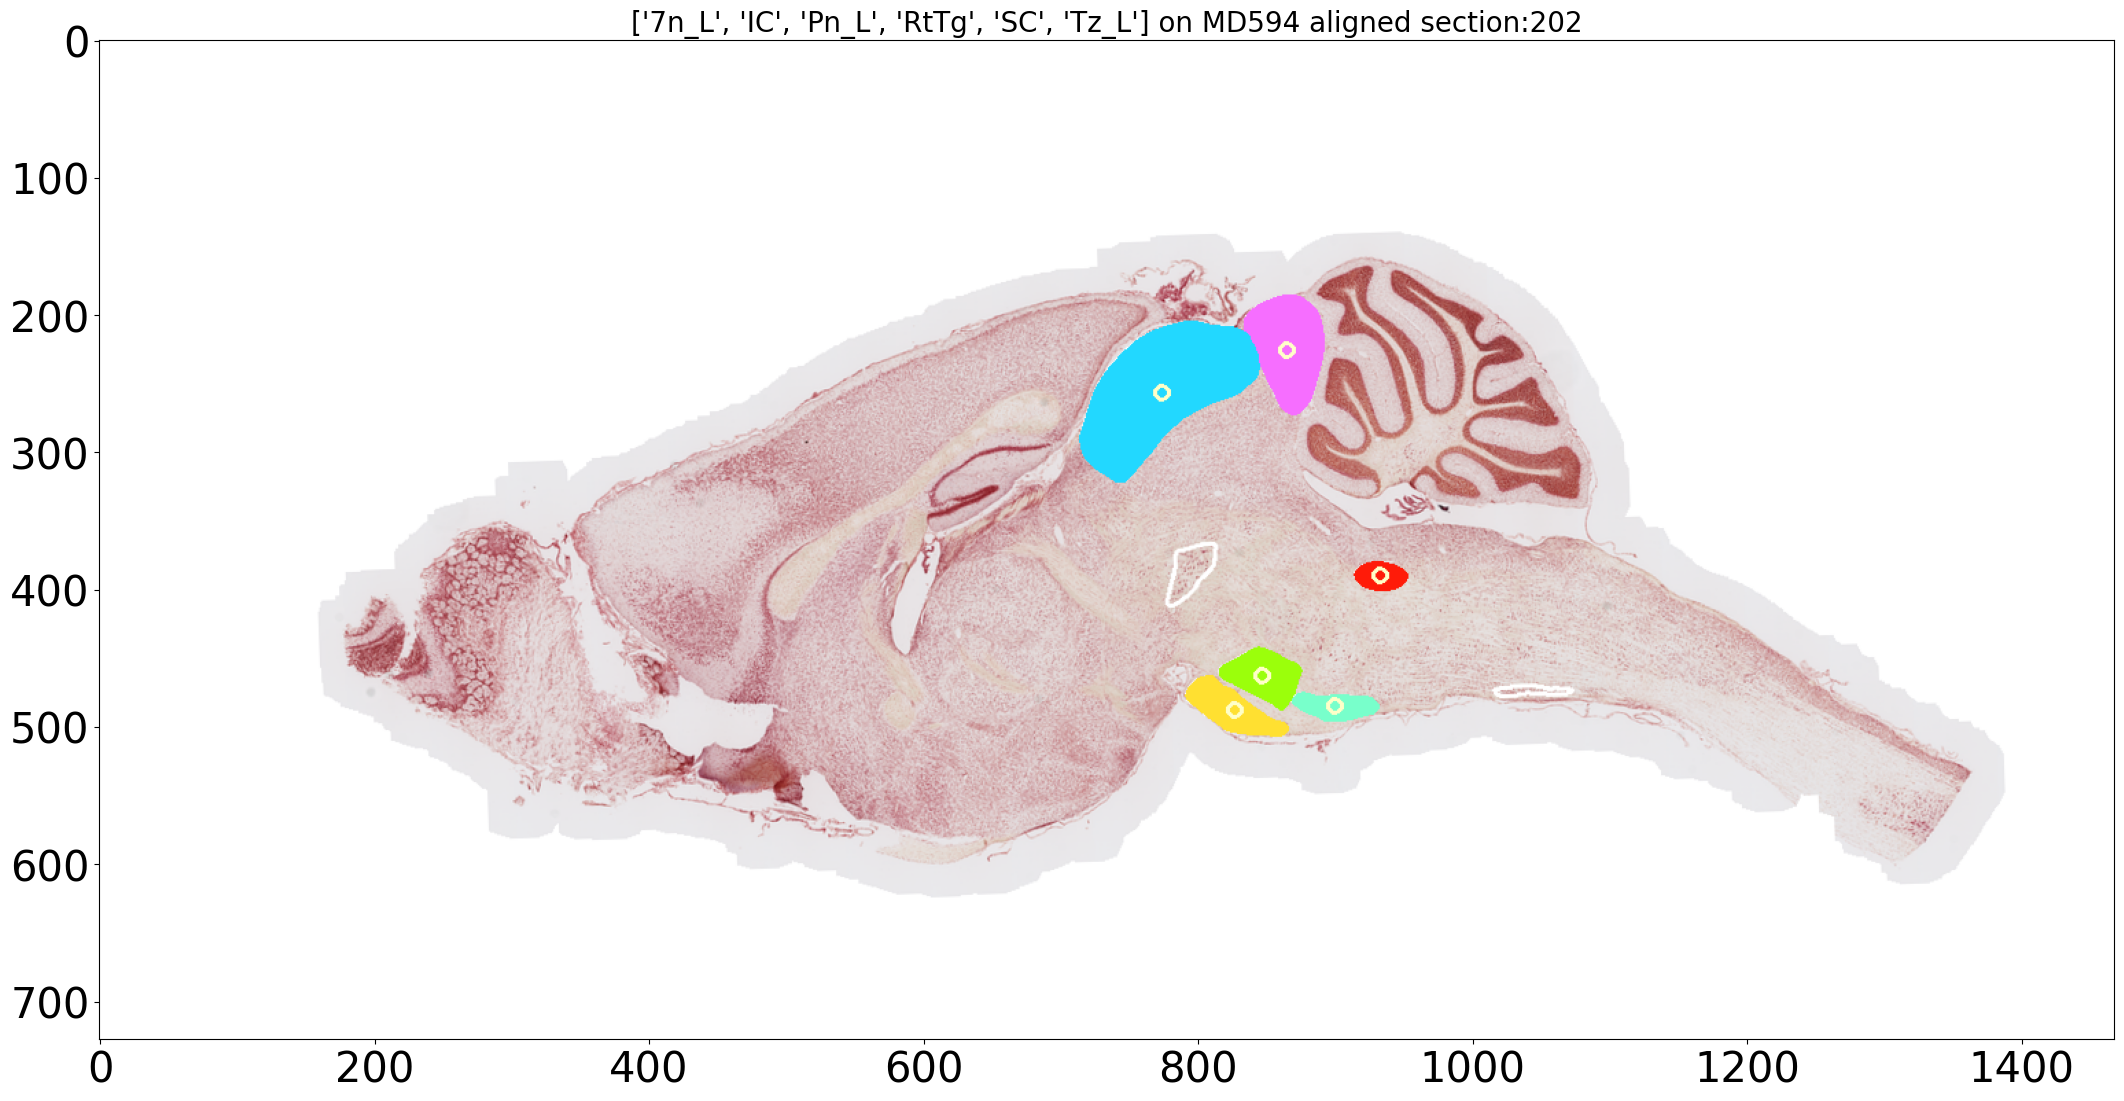

In [8]:
title = []
filepath = os.path.join(INPUT, f'{section}.tif')
print(filepath)
img = cv2.imread(filepath)
for structure, data in aligned_dict.items():
    for s, points in data.items():
        if str(s) == str(section):
            title.append(structure)
            arr = np.array(np.round(points)).astype(np.int32)
            color = sqlController.get_structure_color_rgb(structure)
            cv2.polylines(img, [arr], isClosed=True, color=color, thickness=3)
            cv2.fillPoly(img, pts = [arr], color = color)
            com = np.mean(arr, axis=0)
            cv2.circle(img, (int(com[0]), int(com[1])), 5, (255,255,200), 2)


fig=plt.figure(figsize=(26,18), dpi= 100, facecolor='w', edgecolor='k')
plt.imshow(img, cmap="gray")
plt.title(f'{title} on {animal} aligned section:{section}', fontsize=20)
plt.tick_params(axis='x', labelsize=30)
plt.tick_params(axis='y', labelsize=30)
plt.show()